In [1]:
from __future__ import annotations

from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import models.elec_motor_model as elecmotmod
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
def abbrange(letter: str, a: int, b: int) -> Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a, b))

In [3]:
abbrs = tuple(abbrange("H", 1, 37))
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )

In [4]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    emm_df = elecmotmod.emm_main(abbr, verbose=False)
    dfs[abbr] = emm_df
multidf = pd.concat([dfs[abbr] for abbr in abbrs], ignore_index=True)
multidf.meta = dfs[abbrs[0]].meta
multidf.meta.abbr = "Multi"

In [5]:
model_name = elecmotmod.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = elecmotmod.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

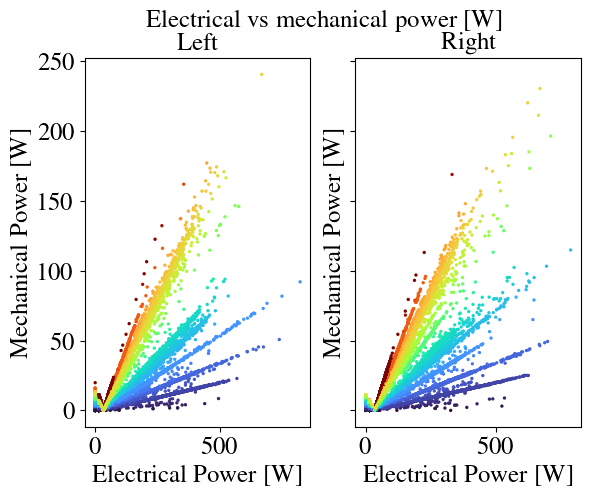

In [6]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True)

ax1.scatter(multidf.PE_L.abs(), multidf.PM_L.abs(), c=multidf.wL.abs(), cmap=cmap, s=2)
ax2.scatter(multidf.PE_R.abs(), multidf.PM_R.abs(), c=multidf.wR.abs(), cmap=cmap, s=2)

# for abbr in abbrs:
#     df = dfs[abbr]
#     ax1.scatter(df.PE_L.abs(), df.PM_L.abs(), alpha=0.2, s=2)
#     ax2.scatter(df.PE_R.abs(), df.PM_R.abs(), alpha=0.2, s=2)

ax1.set_xlabel("Electrical Power [W]")
ax1.set_ylabel("Mechanical Power [W]")
ax1.set_title("Left")

ax2.set_xlabel("Electrical Power [W]")
ax2.set_ylabel("Mechanical Power [W]")
ax2.set_title("Right")


fig.suptitle("Electrical vs mechanical power [W]")
fig.savefig(figdir / f"{model_name}_power.jpg", bbox_inches="tight")


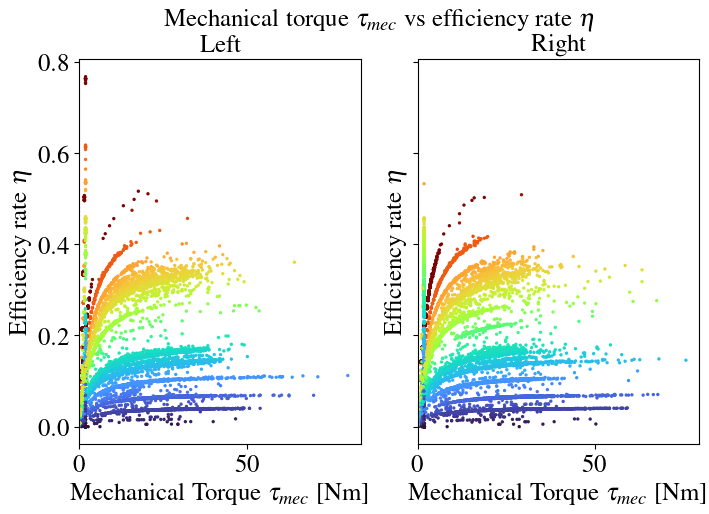

In [7]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, figsize=(8, 5))

ax1.scatter(multidf.TL.abs(), multidf.eta_L.abs(), c=multidf.wL.abs(), cmap=cmap, s=2)
ax2.scatter(multidf.TR.abs(), multidf.eta_R.abs(), c=multidf.wR.abs(), cmap=cmap, s=2)

ax1.set_xlim(left=0)
ax1.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax1.set_ylabel("Efficiency rate $\eta$")
ax1.set_title("Left")

ax2.set_xlim(left=0)
ax2.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax2.set_ylabel("Efficiency rate $\eta$")
ax2.set_title("Right")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

fig.savefig(figdir / f"{model_name}_torque-efficiency-abs.jpg", bbox_inches="tight")


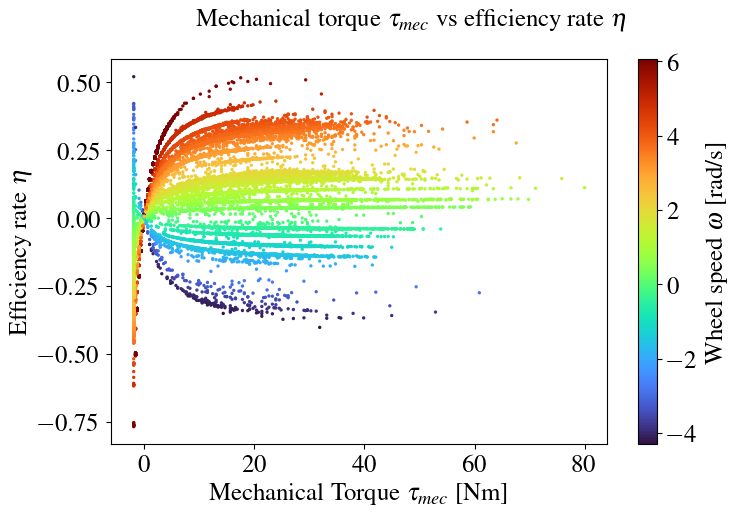

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.TL, multidf.eta_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.eta_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Efficiency rate $\eta$")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-efficiency.{ext}", bbox_inches="tight")


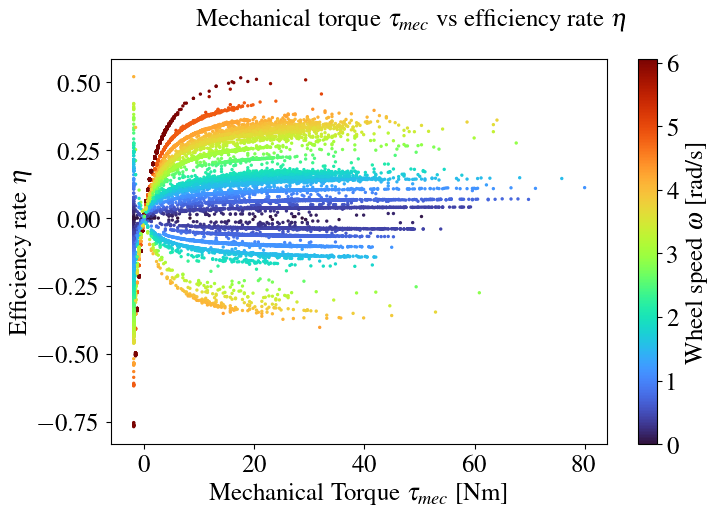

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.abs().min(),
        multidf.wR.abs().min(),
    ),
    vmax=max(
        multidf.wL.abs().max(),
        multidf.wR.abs().max(),
    ),
)

ax.scatter(multidf.TL, multidf.eta_L, c=multidf.wL.abs(), norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.eta_R, c=multidf.wR.abs(), norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Efficiency rate $\eta$")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-efficiency.{ext}", bbox_inches="tight")

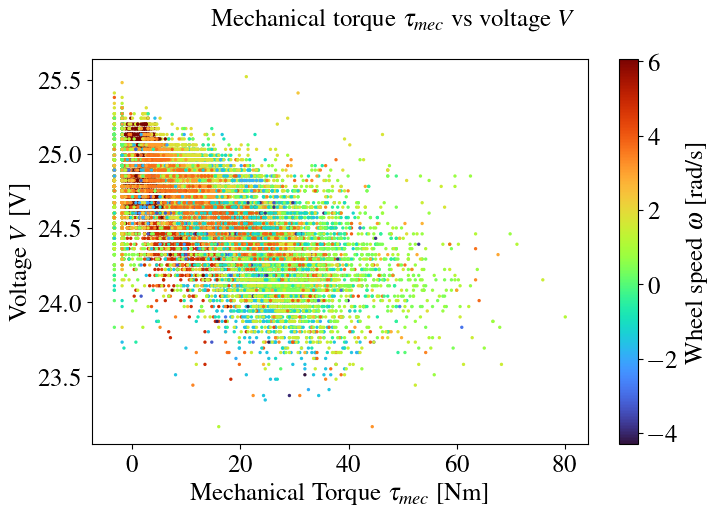

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.TL, multidf.V_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.V_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Voltage $V$ [V]")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs voltage $V$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-voltage.{ext}", bbox_inches="tight")

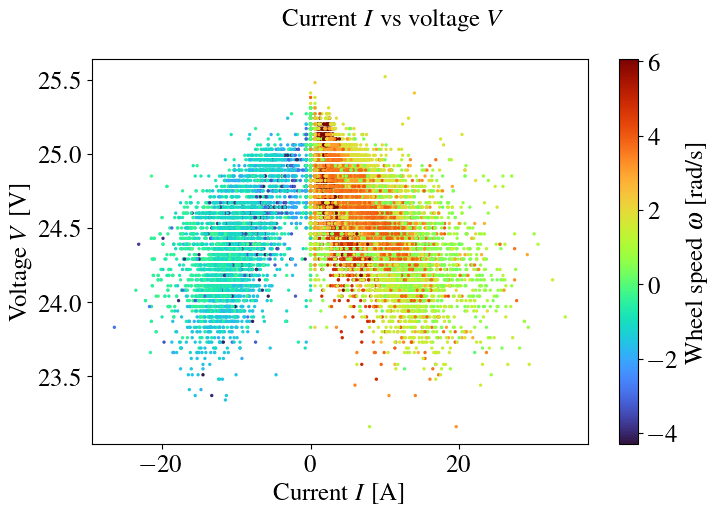

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.Imot_L, multidf.V_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.Imot_R, multidf.V_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Current $I$ [A]")
ax.set_ylabel("Voltage $V$ [V]")

fig.suptitle("Current $I$ vs voltage $V$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_current-voltage.{ext}", bbox_inches="tight")

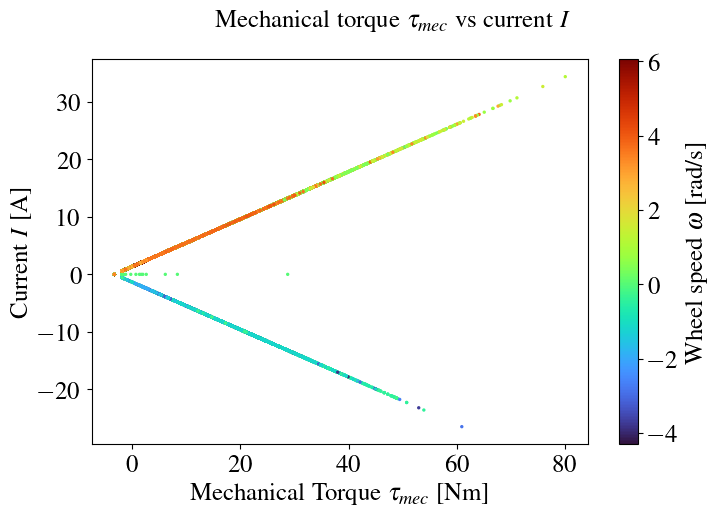

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.TL, multidf.Imot_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.Imot_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Current $I$ [A]")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs current $I$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-current.{ext}", bbox_inches="tight")

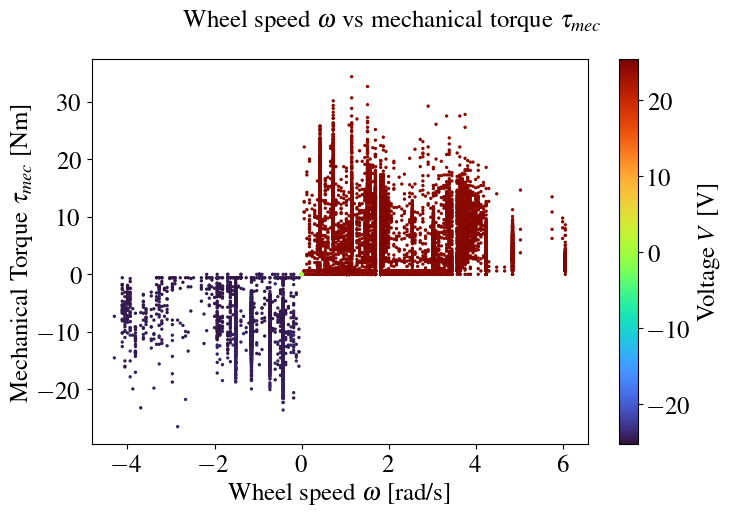

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.Vmot_L.min(),
        multidf.Vmot_R.min(),
    ),
    vmax=max(
        multidf.Vmot_L.max(),
        multidf.Vmot_R.max(),
    ),
)

ax.scatter(multidf.wL, multidf.Imot_L, c=multidf.Vmot_L, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.wR, multidf.Imot_R, c=multidf.Vmot_R, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Voltage $V$ [V]")

# ax.set_xlim(left=0)
ax.set_xlabel("Wheel speed $\\omega$ [rad/s]")
ax.set_ylabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")

fig.suptitle("Wheel speed $\\omega$ vs mechanical torque $\\tau_{{mec}}$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_speed-torque.{ext}", bbox_inches="tight")

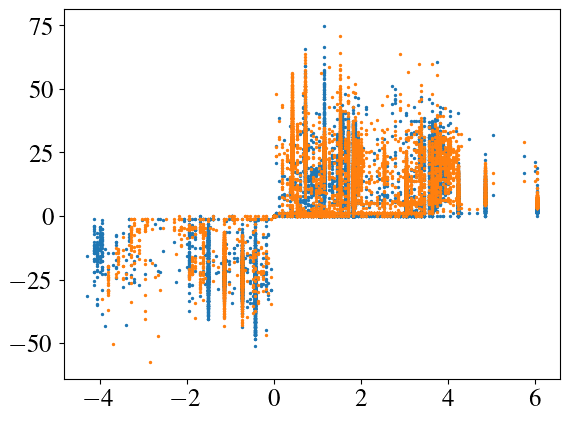

In [14]:
fig, ax = plt.subplots()

dVL = (multidf.Vmot_L - multidf.Emot_L) / multidf.meta.motor_R
dVR = (multidf.Vmot_R - multidf.Emot_R) / multidf.meta.motor_R

# dVL.plot(ax=ax)
import numpy as np
ImotL = multidf.I_L * np.sign(dVL) / multidf.meta.motor_R
ImotR = multidf.I_R * np.sign(dVR) / multidf.meta.motor_R

ax.scatter(multidf.wL, ImotL, s=2)
ax.scatter(multidf.wR, ImotR, s=2)
# multidf.I_L.plot(ax=ax)

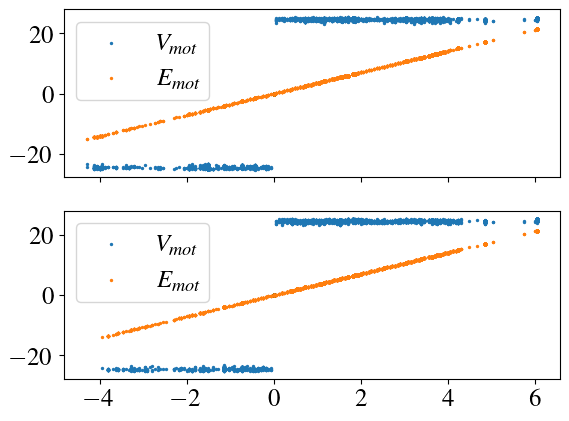

In [15]:
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True)

ax1.scatter(multidf.wL, multidf.Vmot_L, label="$V_{{mot}}$", s=2)
ax1.scatter(multidf.wL, multidf.Emot_L, label="$E_{{mot}}$", s=2)
ax1.legend()
ax2.scatter(multidf.wR, multidf.Vmot_R, label="$V_{{mot}}$", s=2)
ax2.scatter(multidf.wR, multidf.Emot_R, label="$E_{{mot}}$", s=2)
ax2.legend()